## **Test Case Prioritization using Simulated Annealing**

**Test Case Prioritization(TCP)**

Test cases for a traingle classification problem:


1. NumErrorTest
2. TriangleErrorTest
3. ScalTriangleTest
4. RightTriangleTest
5. IsosTriangleTest
6. EquiTriangleTest
    
    




For test cases in software testing or similar contexts, the objective function often represents the effectiveness or coverage of the test cases. Here are some possible objective functions for test cases in the context of software testing:

1. **Code Coverage**: This objective function measures the percentage of code or specific parts of code exercised by the test cases. It could be line coverage, branch coverage, path coverage, etc.

2. **Fault Detection**: The objective is to detect faults or bugs in the software. The function could be based on the number of faults detected or the severity of the faults found by the test cases.

3. **Requirements Coverage**: It assesses the extent to which the test cases cover the specified requirements of the software. It could involve counting the number of requirements covered or measuring the coverage in terms of specified use cases.

4. **Execution Time**: If optimizing test suite execution time is essential, the objective function could minimize the time taken to execute the entire test suite.

5. **Prioritization of Critical Test Cases**: If there are critical or high-priority test cases, the objective function might prioritize these cases to be executed earlier or with higher frequency.

6. **Mutation Score**: In mutation testing, the objective could be to maximize the mutation score, which indicates the effectiveness of the test suite in detecting artificial faults introduced into the code.

The selection of the objective function depends on the specific testing goals and the aspects of the software you want to focus on. It's essential to choose an objective function that aligns with the goals of your testing process.

In [8]:
import random
import math
import matplotlib.pyplot as plt

In [9]:
# Replace this function with your objective function based on your test suite
def objective_function(test_order):
    # Placeholder random objective function
    return random.uniform(0, 1)



In [10]:
# Function to swap two test cases in the order
def swap_test_cases(test_order, i, j):
    test_order[i], test_order[j] = test_order[j], test_order[i]

In [17]:
# Simulated Annealing algorithm for test case prioritization
def simulated_annealing(test_order, initial_temperature, final_temperature, cooling_rate):
    current_state = test_order[:]
    current_value = objective_function(current_state)
    best_state = current_state[:]
    best_value = current_value

    temperature = initial_temperature

    iterations = []
    values = []
    temperatures = []

    while temperature > final_temperature:
        iterations.append(len(iterations) + 1)
        values.append(current_value)
        temperatures.append(temperature)

        # Generate neighboring state by swapping two random test cases
        neighbor_state = current_state[:]
        swap_test_cases(neighbor_state, random.randint(0, len(test_order) - 1), random.randint(0, len(test_order) - 1))

        # Calculate objective value for the neighbor state
        neighbor_value = objective_function(neighbor_state)

        # Calculate the change in objective function value
        delta = neighbor_value - current_value

        # Decide whether to accept the neighbor state
        if delta > 0 or math.exp(delta / temperature) > random.uniform(0, 1):
            current_state = neighbor_state
            current_value = neighbor_value

            if current_value > best_value:
                best_state = current_state[:]
                best_value = current_value

        # Cool the temperature
        temperature *= cooling_rate

    # Plotting the objective function value and temperature changes over iterations
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(iterations, values, 'b-')
    plt.xlabel('Iterations')
    plt.ylabel('Objective Function Value')
    plt.title('Objective Function Value vs. Iterations')

    plt.subplot(1, 2, 2)
    plt.plot(iterations, temperatures, 'r-')
    plt.xlabel('Iterations')
    plt.ylabel('Temperature')
    plt.title('Temperature vs. Iterations')

    plt.tight_layout()
    plt.show()

    return best_state


In [18]:
# Example usage:
# Replace 'test_cases' with your list of test cases
test_cases = ['Test Case 1', 'Test Case 2', 'Test Case 3', 'Test Case 4', 'Test Case 5']


In [19]:

# Set initial temperature, final temperature, and cooling rate
initial_temp = 1000
final_temp = 0.1
cooling_rate = 0.99


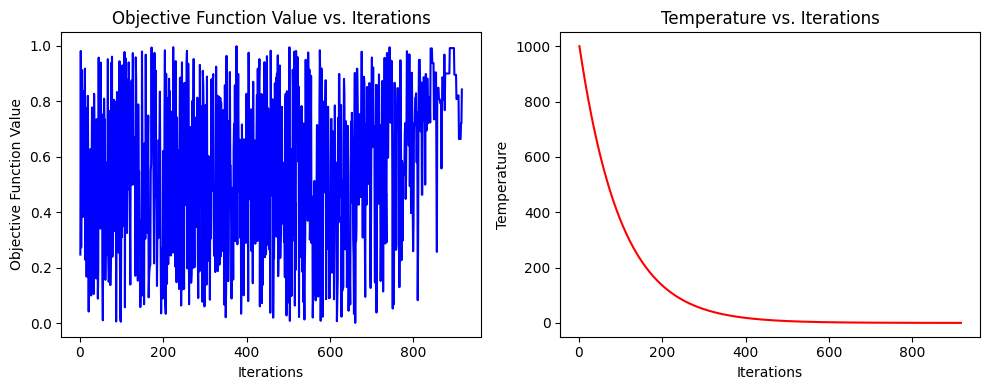

Optimized Test Case Order: ['Test Case 3', 'Test Case 2', 'Test Case 5', 'Test Case 4', 'Test Case 1']


In [20]:



# Run simulated annealing
optimized_test_order = simulated_annealing(test_cases, initial_temp, final_temp, cooling_rate)

print("Optimized Test Case Order:", optimized_test_order)

In [21]:
qualities=[]

In [22]:
import random
import math

# Define test cases and their corresponding points/values
test_cases = {
    'A': {'NumErrorTest': [1, 1, 1]},
    'B': {'TriangleErrorTest': [1, 1, 1]},
    'C': {'ScalTriangleTest': [2, 1, 1, 2, 1, 1, 3]},
    'D': {'RightTriangleTest': [2, 1, 1, 2, 1, 1, 3]},
    'E': {'IsosTriangleTest': [2, 1, 1, 2, 1, 1, 3]},
    'F': {'EquiTriangleTest': [3, 1, 1, 3, 1, 1, 3]}
}

# Define the initial sequence of test case prioritization
initial_sequence = list(test_cases.keys())

# Function to evaluate the quality of the prioritization sequence
def evaluate_quality(sequence):
    # Implement your quality evaluation here based on the triangle classification criteria
    # For example, you can calculate the correctness of classification or minimize errors
    # This function will depend on the specific evaluation criteria

    # For demonstration purposes, this example evaluates the sequence randomly
    return random.uniform(0, 1)

# Simulated Annealing Algorithm
def simulated_annealing_triangle_classification(initial_sequence, temperature, cooling_rate, min_temp):
    current_sequence = initial_sequence[:]
    best_sequence = current_sequence[:]
    current_quality = evaluate_quality(current_sequence)
    best_quality = current_quality
            # Store the quality value corresponding to the current solution


    while temperature > min_temp:
        for _ in range(100):  # Number of inner loop iterations
            index_1, index_2 = random.sample(range(len(current_sequence)), 2)
            new_sequence = current_sequence[:]
            new_sequence[index_1], new_sequence[index_2] = new_sequence[index_2], new_sequence[index_1]
            new_quality = evaluate_quality(new_sequence)
            if new_quality > current_quality or random.random() < math.exp((new_quality - current_quality) / temperature):
                current_sequence = new_sequence
                current_quality = new_quality

                if new_quality > best_quality:
                    best_sequence = new_sequence
                    best_quality = new_quality
            qualities.append(current_quality)

        temperature *= cooling_rate

    return best_sequence, best_quality

# Set initial temperature and other parameters
initial_temperature = 1000
cooling_rate = 0.99
minimum_temperature = 0.1

# Run simulated annealing
best_sequence, best_quality = simulated_annealing_triangle_classification(initial_sequence, initial_temperature, cooling_rate, minimum_temperature)

# Output the best sequence and its quality
print("Best Sequence:", best_sequence)
print("Best Quality:", best_quality)


Best Sequence: ['C', 'A', 'D', 'B', 'F', 'E']
Best Quality: 0.9999766595954238
